# Assignment Notebook

## Data Visualisation and using statistical learning to answer a business question 



## Part 1: Data Visualisation

### 1.1 Import libraries

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. **2,233** respondents completed the survey.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe.

In [3]:
#import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# YOUR CODE HERE, TO READ THE DATA FROM THE CSV FILE
df = pd.read_csv('Topic_Survey_Assignment.csv')
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


### 1.2 Visualisation

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.
To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.

As for the chart:
1. use a figure size of (20, 8),
2. bar width of 0.8,
3. use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
4. use font size 14 for the bar labels, percentages, and legend,
5. use font size 16 for the title, and,
6. display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [8]:
#prep the data
df_sorted = df.sort_values(by='Very interested', ascending=False)

total_respondents = 2233
df['Very interested'] = (df['Very interested'] / total_respondents * 100).round(2)
df['Somewhat interested'] = (df['Somewhat interested'] / total_respondents * 100).round(2)
df['Not interested'] = (df['Not interested'] / total_respondents * 100).round(2)

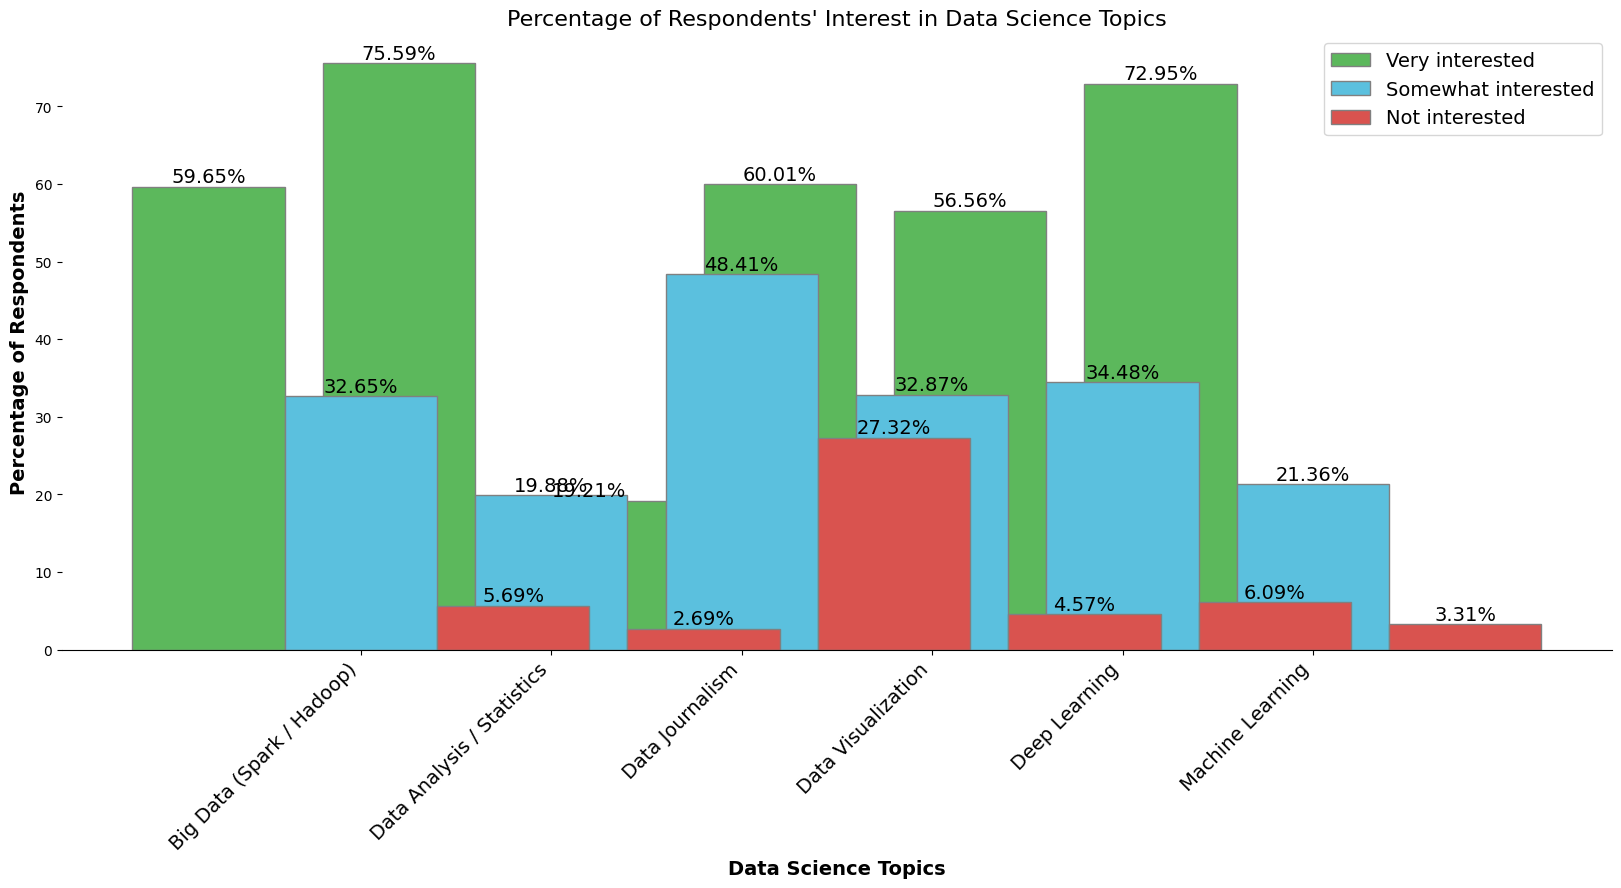

In [9]:
#create the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Bar width
bar_width = 0.8

# Positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
bars1 = ax.bar(r1, df['Very interested'], color='#5cb85c', width=bar_width, edgecolor='grey', label='Very interested')
bars2 = ax.bar(r2, df['Somewhat interested'], color='#5bc0de', width=bar_width, edgecolor='grey', label='Somewhat interested')
bars3 = ax.bar(r3, df['Not interested'], color='#d9534f', width=bar_width, edgecolor='grey', label='Not interested')

# Add labels
ax.set_xlabel('Data Science Topics', fontweight='bold', fontsize=14)
ax.set_ylabel('Percentage of Respondents', fontweight='bold', fontsize=14)
ax.set_title('Percentage of Respondents\' Interest in Data Science Topics', fontsize=16)
ax.set_xticks([r + bar_width for r in range(len(df))])
ax.set_xticklabels(df['Unnamed: 0'], rotation=45, ha='right', fontsize=14)
ax.legend(fontsize=14)

# Display percentages above bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}%', ha='center', va='bottom', fontsize=14)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Part 2: Supervised learning using a tree-based model

### 2.1 Import libraries

In [ ]:
# Import libraries
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For tree-based model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


### 2.2 Import and explore the insurance claim data

In [10]:
# Import data
df = pd.read_csv('ClaimsData.csv')

In [14]:
# Explore the size of the data set
size = df.shape
num_rows = df.shape[0]
num_columns = df.shape[1]

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')
print(size) 
df.head()

Number of rows: 1500
Number of columns: 7
(1500, 7)


,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes


In [15]:
# Explore type of data and feature names
df.dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Claim      1500 non-null   float64
 1   Category   1500 non-null   object 
 2   Mileage    1500 non-null   float64
 3   AgeP       1500 non-null   int64  
 4   ModelYear  1500 non-null   int64  
 5   PreOwned   1500 non-null   object 
 6   ServHist   1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


,Claim,Mileage,AgeP,ModelYear
count,1500.000000,1500.000000,1500.000000,1500.00000
mean,24664.065427,99167.131467,39.224667,2016.36600
std,5630.144088,30665.641808,13.668312,1.70704
min,10228.780000,22681.100000,17.000000,2011.00000
25%,20804.477500,77330.450000,28.000000,2015.00000
50%,24209.870000,95939.200000,37.000000,2017.00000
75%,27818.390000,118311.500000,48.250000,2018.00000
max,50894.930000,202394.300000,81.000000,2019.00000


 #### 2.3 Plot the data

**a) Visualise the continuous variables on a scatterplot**

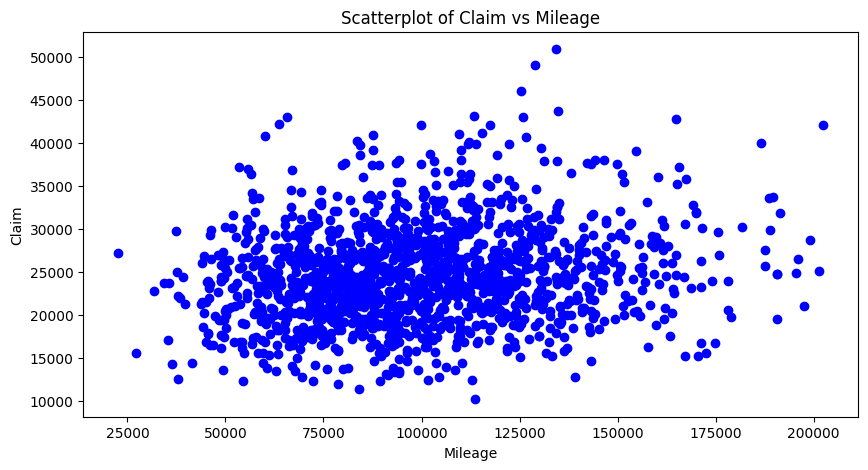

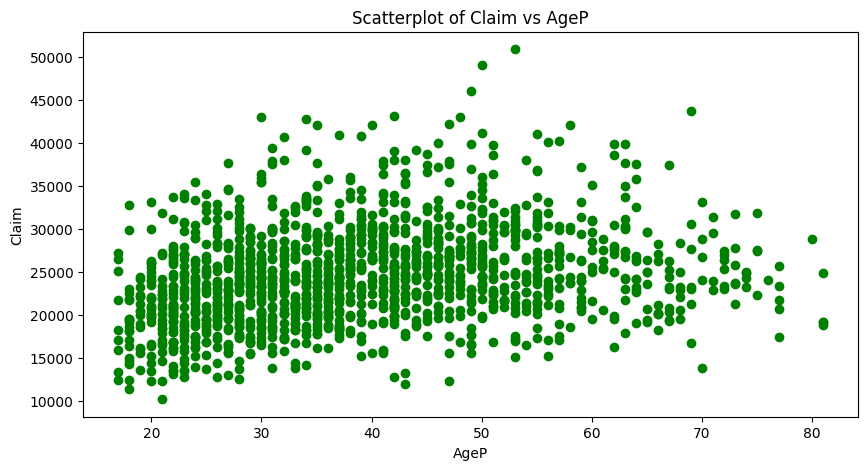

In [16]:
# Plot a scatterplot of y vs the continuous variables (Mileage and AgeP)
plt.figure(figsize=(10, 5))
plt.scatter(df['Mileage'], df['Claim'], color='blue')
plt.title('Scatterplot of Claim vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Claim')
plt.show()

# Scatterplot of Claim vs AgeP
plt.figure(figsize=(10, 5))
plt.scatter(df['AgeP'], df['Claim'], color='green')
plt.title('Scatterplot of Claim vs AgeP')
plt.xlabel('AgeP')
plt.ylabel('Claim')
plt.show()

**b) Compare the mean claim amount for categorical variables**  

In [17]:
# Calculate the mean claim amount of pre-owned and not pre-owned vehicles
# Mean claim amount for pre-owned vehicles
mean_pre_owned = df[df['PreOwned'] == 'Yes']['Claim'].mean()
print(f'Mean claim amount for pre-owned vehicles: {mean_pre_owned}')

# Mean claim amount for not pre-owned vehicles
mean_not_pre_owned = df[df['PreOwned'] == 'No']['Claim'].mean()
print(f'Mean claim amount for not pre-owned vehicles: {mean_not_pre_owned}')

Mean claim amount for pre-owned vehicles: 26987.035105973027
Mean claim amount for not pre-owned vehicles: 23435.093700305813


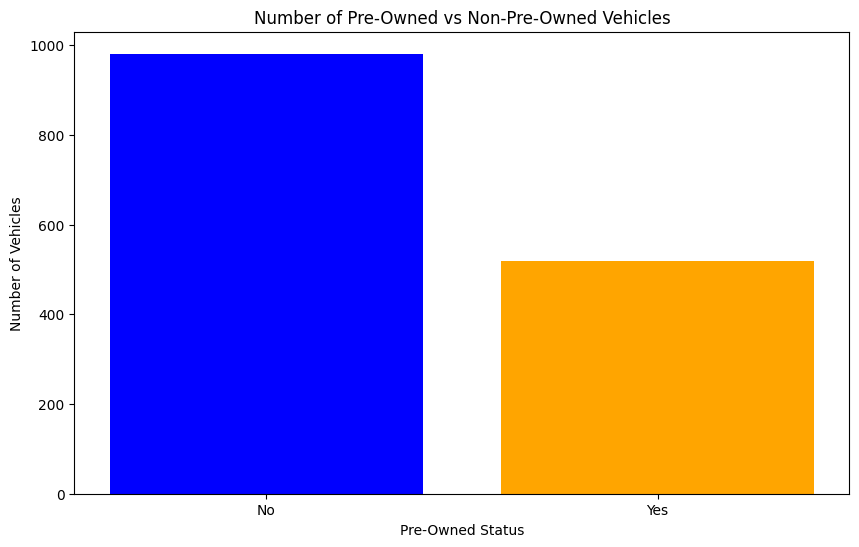

In [18]:
# Plot the pre-owned vs non-pre-owned vehicles
pre_owned_counts = df['PreOwned'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(pre_owned_counts.index, pre_owned_counts.values, color=['blue', 'orange'])
plt.title('Number of Pre-Owned vs Non-Pre-Owned Vehicles')
plt.xlabel('Pre-Owned Status')
plt.ylabel('Number of Vehicles')
plt.show()

In [19]:
# Calculate the mean claim amount of vehicles with and without service histories
# Mean claim amount for vehicles with service history
mean_with_service_hist = df[df['ServHist'] == 'Yes']['Claim'].mean()
print(f'Mean claim amount for vehicles with service history: {mean_with_service_hist}')

# Mean claim amount for vehicles without service history
mean_without_service_hist = df[df['ServHist'] == 'No']['Claim'].mean()
print(f'Mean claim amount for vehicles without service history: {mean_without_service_hist}')

Mean claim amount for vehicles with service history: 24780.54348513011
Mean claim amount for vehicles without service history: 24368.474882075472


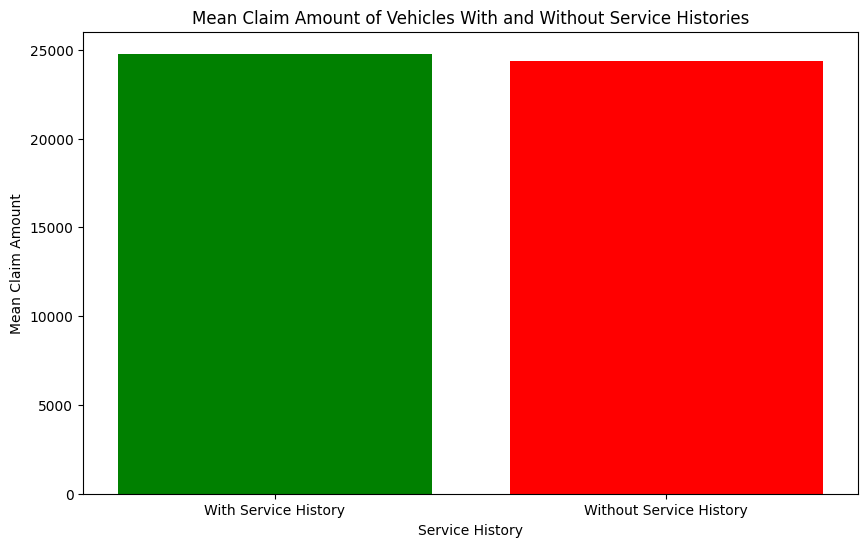

In [20]:
# Plot the mean claim amount of vehicles with and without service histories
mean_with_service_hist = df[df['ServHist'] == 'Yes']['Claim'].mean()
mean_without_service_hist = df[df['ServHist'] == 'No']['Claim'].mean()

mean_claims = pd.DataFrame({
    'Service History': ['With Service History', 'Without Service History'],
    'Mean Claim Amount': [mean_with_service_hist, mean_without_service_hist]
})
plt.figure(figsize=(10, 6))
plt.bar(mean_claims['Service History'], mean_claims['Mean Claim Amount'], color=['green', 'red'])
plt.title('Mean Claim Amount of Vehicles With and Without Service Histories')
plt.xlabel('Service History')
plt.ylabel('Mean Claim Amount')
plt.show()

In [21]:
# Calculate the mean claim amount of vehicles in each category
mean_claim_by_category = df.groupby('Category')['Claim'].mean()
print(mean_claim_by_category)

Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


In [22]:
# Calculate the mean claim amount of vehicles for each model year
mean_claim_by_model_year = df.groupby('ModelYear')['Claim'].mean()
print(mean_claim_by_model_year)

ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


### Insights Drawn From Graphs

1. In the exploratory data analysis, several graphs and calculations were provided: two scatterplots, two bar graphs, and two calculations without graphs. What insight can you draw from these? In your answer, give a short interpretation for two graphs or calculations. For example, are there cars with a particular mileage that have larger claims? Are the mean claim amounts in any of the categories different? Ensure that you provide possible reasons for any differences you observe. 

    ```ANSWER:```

#### 2.4 Prepare the data

In [ ]:
# Check that there are no missing values
# YOUR CODE HERE,

In the next cell, you will one-hot encode the `Category` variable. You may also refer to the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [user guide](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

In [ ]:
# One-hot encode the "Category" variable and add the encoded feature to the dataframe 
# Name the new columns (hint: columns = ohe.get_feature_names())
# YOUR CODE HERE,


# Add encoded feature to the dataframe and view the new dataframe with .head()
# YOUR CODE HERE,

Choose the following variables as features: `Mileage`, `AgeP`, and `Category0` to `Category5`. You may use the `.loc[]` or `.iloc[]` method.


In [ ]:
# Split data into features (X) and response (y) 
# YOUR CODE HERE


In [ ]:
X.head()

In [ ]:
y.head()

#### 2.5 Split the data into a training and test set

Recall that, in the 3.3 IDE activity M3U2 practice notebook, the steps in the following cell were introduced. You may also reference the documentation on the [scikit-learn website](https://scikit-learn.org/stable/index.html) for the following:
* train_test_split()
* DecisionTreeRegressor()
* mean_squared_error()

In [ ]:
# Split the data into the training set and test set 
# Set random_state=0
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=0)

# Fit data to tree-based model
# Set random_state=0
# YOUR CODE HERE,

# What is the mean squared error (MSE) prior to pruning?
# Assign the MSE to the variable name "error"
# YOUR CODE HERE,


# Print the MSE before pruning
# YOUR CODE HERE,

In [ ]:
# Plot the unpruned tree
# YOUR CODE HERE,

In [ ]:
# Replace "reg" with the variable name you chose in "Fit data to tree-based model" above
# YOUR CODE HERE,

In [ ]:
# Finding the optimal number of leaf nodes
# YOUR CODE HERE,

In [ ]:
# Visualise the performance of each subtree on the training and test set
# YOUR CODE HERE,

In [ ]:
# To find the optimal maximum leaf nodes, cross validation is applied
# YOUR CODE HERE,

In [ ]:
# Visualise the validation score in relation to maximum leaf nodes
# YOUR CODE HERE,

In [ ]:
# Obtain the maximum leaf nodes with the highest validation score
# YOUR CODE HERE,

In [ ]:
# Use the optimum maximum leaf nodes to fit a parsimonious tree 
# Set random_state=0
# YOUR CODE HERE,

In [ ]:
# Visualise the smaller pruned tree
# YOUR CODE HERE,

In [ ]:
# Show the first few levels of the tree
# YOUR CODE HERE,

1.  Recall the node to the left indicates that the above criterion is true while the node to the right indicates that it is false.
   * left = true
   * right = false
2. For nodes splitting on a categorical variable:
   * node left of `<= 0.5` = 0
   * node right of `<= 0.5` = 1

In [ ]:
# Save the plot as an image to read the information in the nodes
# YOUR CODE HERE,

In [ ]:
# Final test to see how the model performs: 
# Assign the MSE to the variable name "error2"
# YOUR CODE HERE,



In [ ]:
# What is the final model to be used for predictions in future? 
# Set random_state=0
# YOUR CODE HERE,

### Insight Questions from a Fitted Tree-Based Model 


1. You were asked to fit a tree-based model to this data set. Why do you think a tree-based model is more appropriate than a neural network in this scenario?

    ```ANSWER:```

2. Use the decision tree image you generated to gain insight into the factors that affect the claim amount. Start by looking at the first split of the decision tree, and recommending a course of action with regard to the age of the driver. Choose two more nodes to interpret, and comment on the impact the output could have on premiums.

    ```ANSWER:```


#### The End!